## Importation des modules et des bases de données dont nous aurons besoin pour la visualisation de la data

In [130]:
# Import of all the libraries we need

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Import of the datas we need to analyze

calendar_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_calendar.csv").sample(20000)
listings_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_listings.csv").sample(20000)
reviews_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_reviews.csv").sample(20000)

## Visualisation afin de repérer quelques indicateurs

### 1. Un peu de description ...

In [131]:
round(calendar_data["price"].describe())

count    20000.0
mean       120.0
std        193.0
min          0.0
25%         60.0
50%         80.0
75%        125.0
max       9000.0
Name: price, dtype: float64

In [132]:
round(listings_data["price"].describe())

count    20000.0
mean       115.0
std        198.0
min          0.0
25%         58.0
50%         80.0
75%        120.0
max      10250.0
Name: price, dtype: float64

### 2. et de la visualisation

#### a. Analyse univariée

##### Variables qualitatives

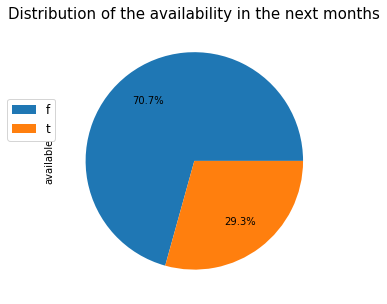

In [133]:
# Labels and values of the variable
labels = calendar_data["available"].value_counts().index
values = calendar_data["available"].value_counts()

# Creation of a pie chart
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Distribution of the availability in the next months", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

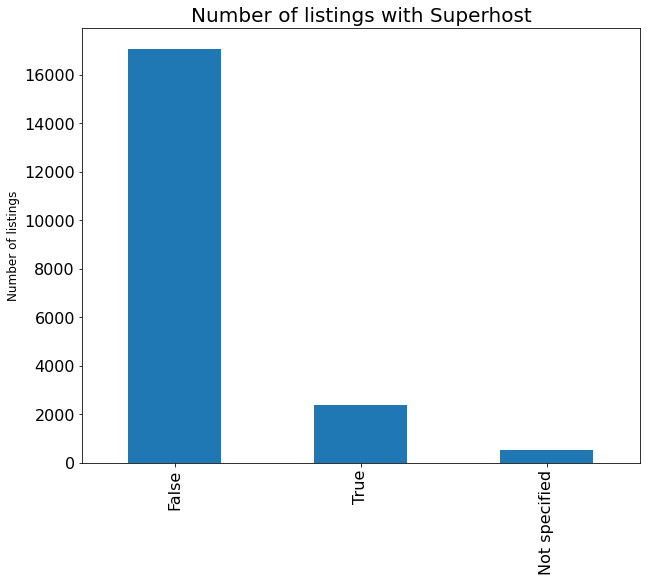

In [134]:
listings_data['host_is_superhost'] = listings_data['host_is_superhost'].replace({"t": "True", "f": "False"})

feq=listings_data['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8))
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()


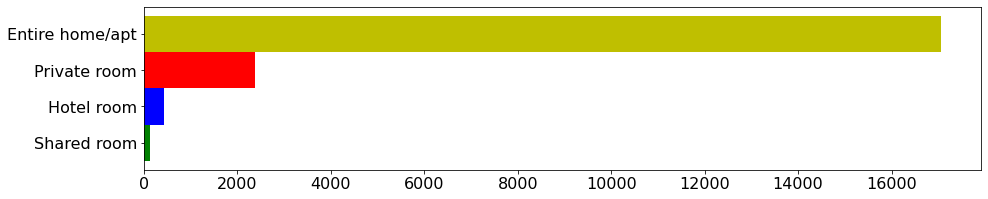

In [135]:
# Creation of an horizontal bar plot

freq = listings_data['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r","y"])
plt.show()

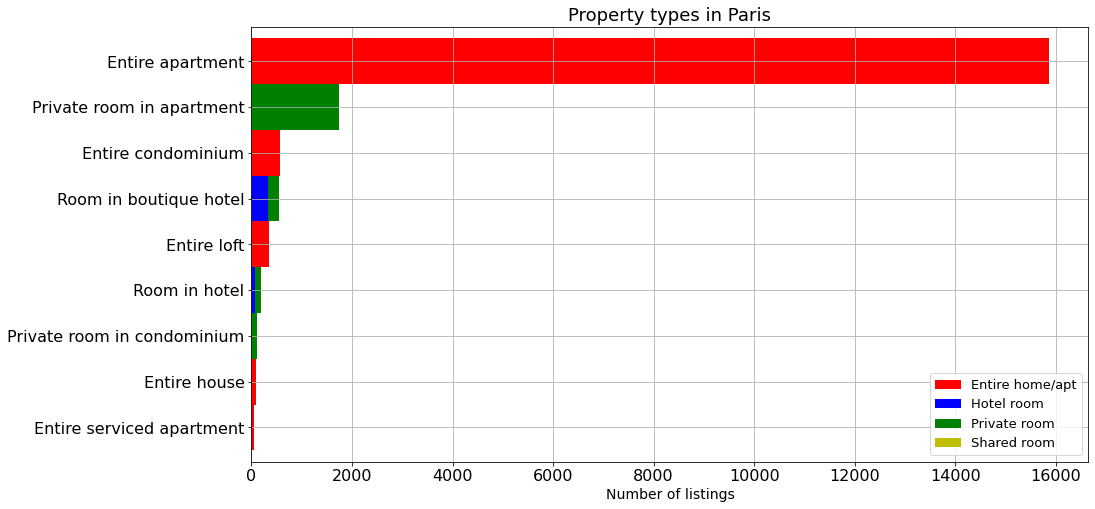

In [136]:
prop = listings_data.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=50]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Paris', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

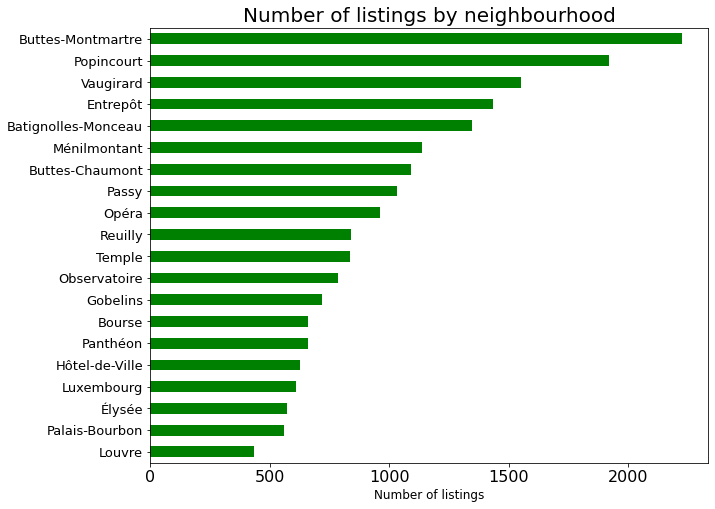

In [137]:
values = listings_data['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
values.plot.barh(figsize=(10, 8), color='g', width=0.5)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

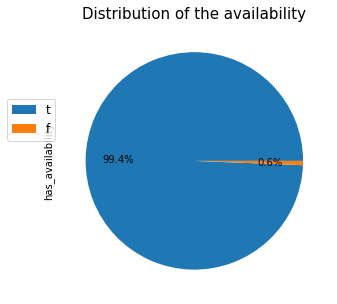

In [138]:
# Labels and values of the variable
labels = listings_data["has_availability"].value_counts().index
values = listings_data["has_availability"].value_counts()

# Creation of a pie chart
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Distribution of the availability", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

##### Variables quantitatives

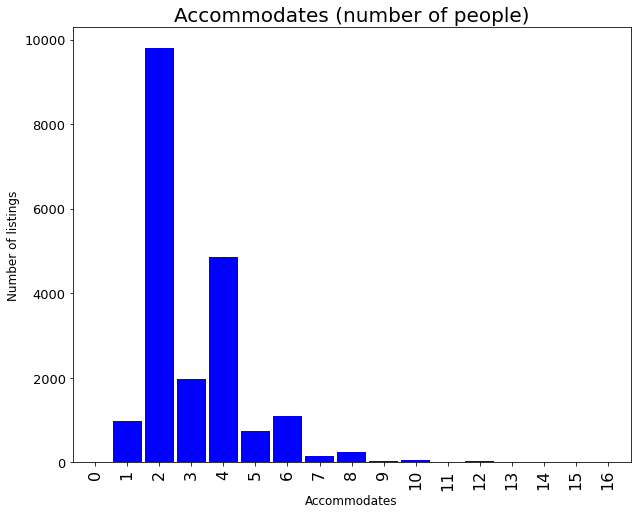

In [139]:
feq=listings_data['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=0.9)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

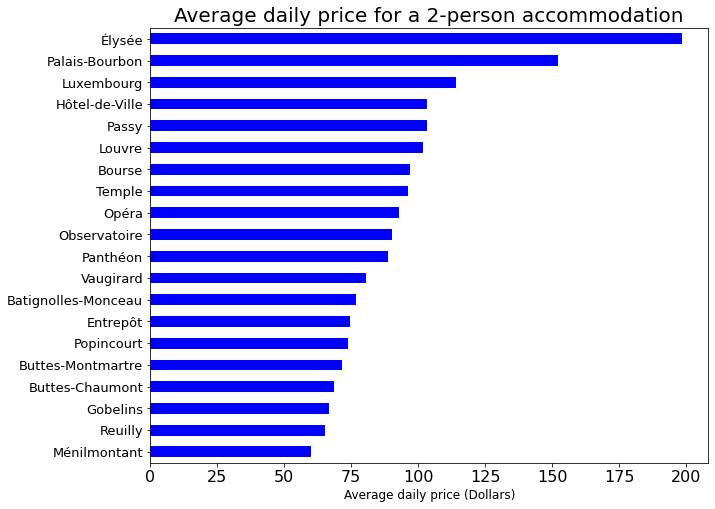

In [140]:
feq = listings_data[listings_data['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b')
plt.title("Average daily price for a 2-person accommodation", fontsize=20)
plt.xlabel('Average daily price (Dollars)', fontsize=12)
plt.ylabel("")
plt.show()

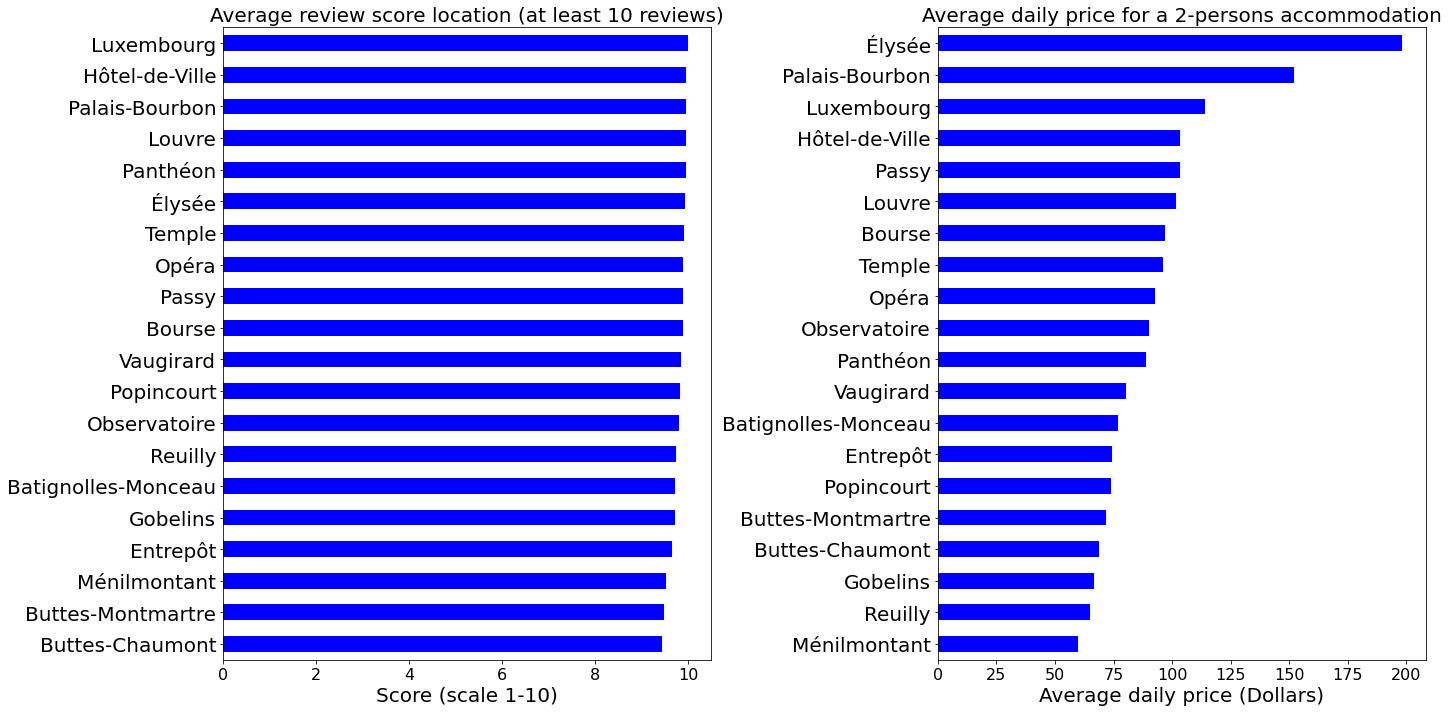

In [141]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings_data[listings_data['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood_cleansed')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b')
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings_data[listings_data['accommodates']==2]
feq2 = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b')
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Dollars)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

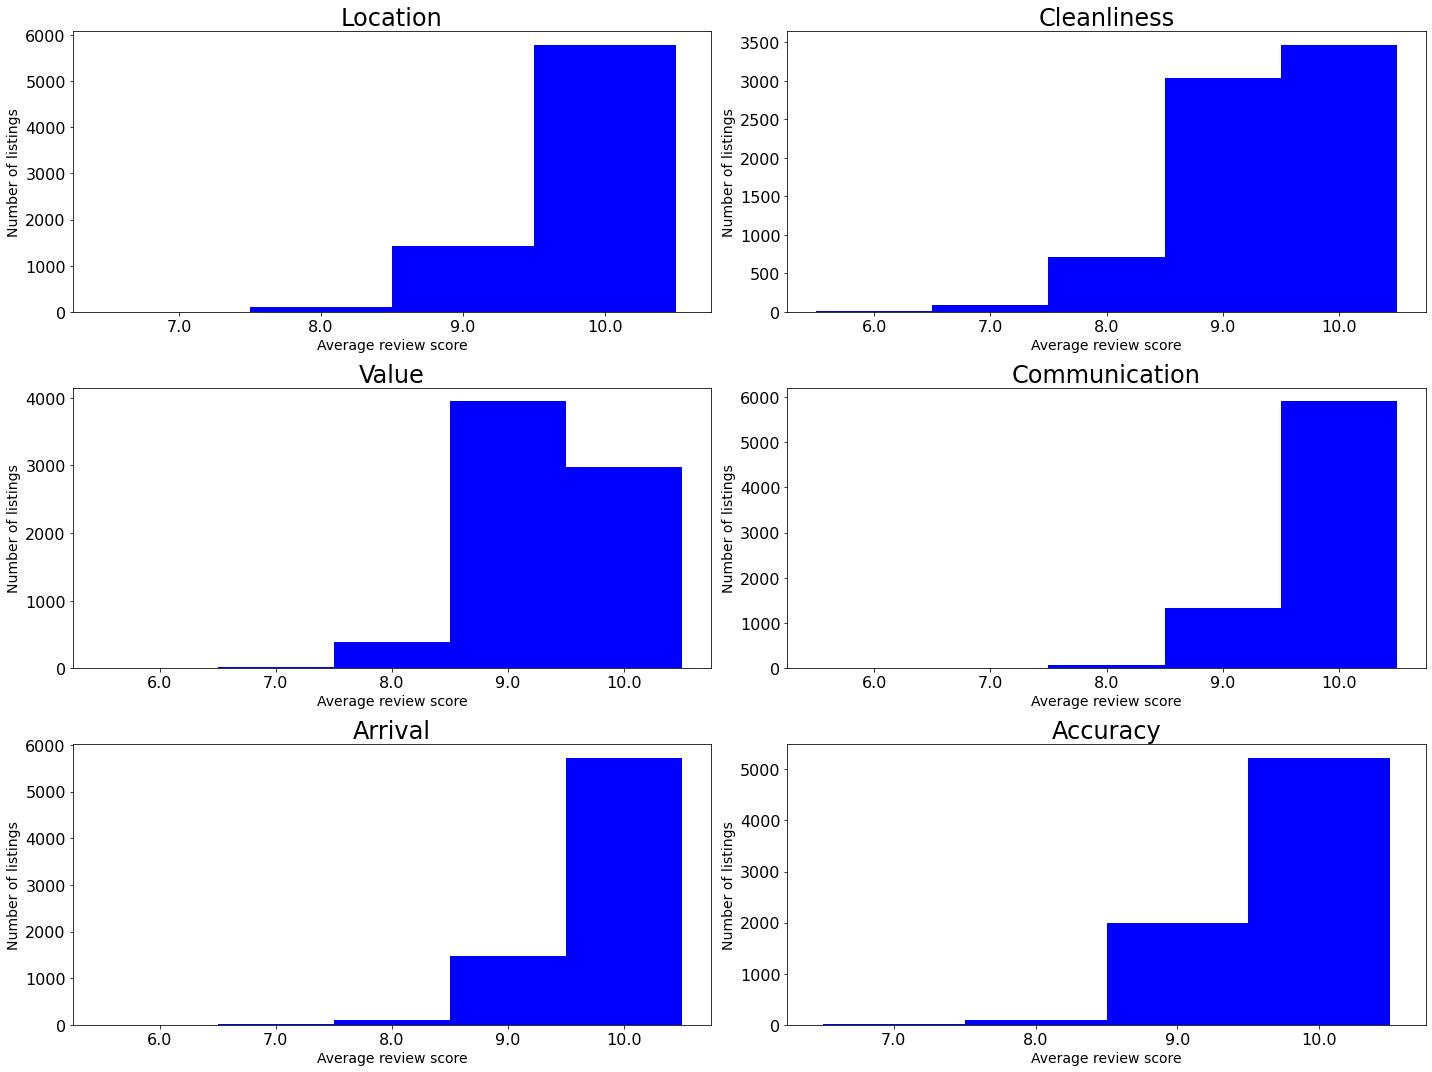

In [142]:
listings10 = listings_data[listings_data['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

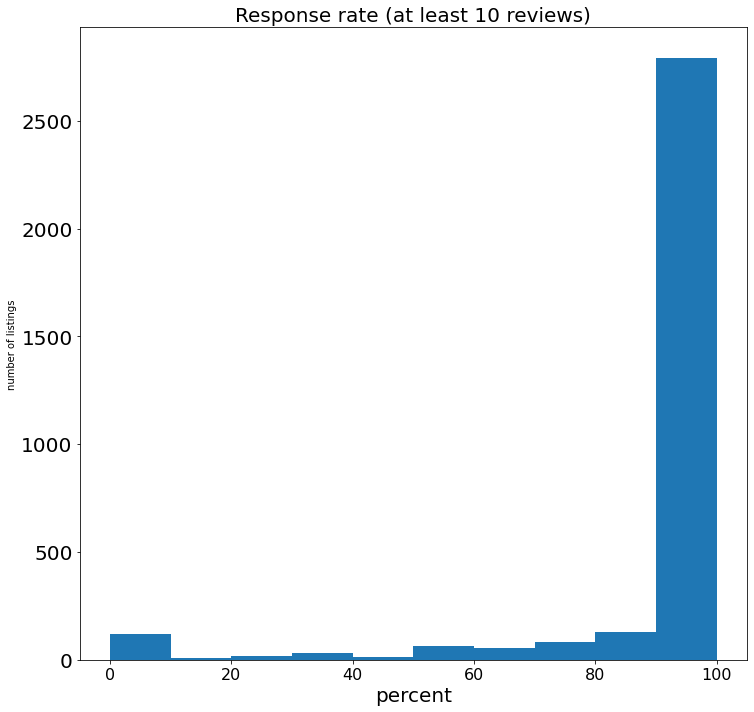

In [143]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

# ax2 = fig.add_subplot(122)
# feq2 = listings10['host_response_time'].value_counts()
# ax2=feq2.plot.bar(color='b', rot=45)
# plt.title("Response time (at least 10 reviews)", fontsize=20)
# plt.ylabel("number of listings")

plt.tight_layout()
plt.show()